In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, accuracy_score, log_loss, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
import os
if not os.path.exists("images_to_pdf"):
    os.mkdir("images_to_pdf")

In [3]:
#df = pd.read_csv('../../data/telcom_numeric.csv')
df = pd.read_csv('../../data/telecom_pca.csv')
x = df.drop(columns=['TARGET'])
y = df['TARGET']

In [4]:
#scaler = StandardScaler()
#scaler.fit(x)
#x = scaler.transform(x)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 1)

In [6]:
random_forest = RandomForestClassifier(max_depth = 3, random_state = 1)


In [7]:
kfold = KFold(n_splits = 5, random_state=42, shuffle=True)
cv_results = cross_val_score(random_forest, x,y, cv = kfold, scoring='accuracy', verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.997) total time= 1.9min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV] END ................................ score: (test=0.998) total time= 2.0min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.9min remaining:    0.0s


[CV] END ................................ score: (test=0.998) total time= 1.9min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.8min remaining:    0.0s


[CV] END ................................ score: (test=0.994) total time= 2.0min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  7.8min remaining:    0.0s


[CV] END ................................ score: (test=0.998) total time= 2.0min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.8min finished


In [8]:
print(cv_results.mean(), cv_results.std())

0.9968972587657191 0.0013753030947746782


In [9]:
x_test

,Unnamed: 0,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL
570153,570153,2018,2019,194.470005,209.166667,1,579.155000,3,2,0,199.575000,68.925,14.805,0.010,0.625,159.925,0.000,4760.264160,0.0
1030481,1030481,2016,2019,660.529964,664.283333,3,778.710000,3,1,0,778.101667,630.500,83.735,33.715,111.775,0.000,0.000,13992.359697,0.0
204211,204211,2010,2019,340.964161,481.666667,1,2661.966667,3,4,1,391.055000,458.000,47.165,22.975,8.970,2.700,0.000,15666.332031,0.0
1020482,1020482,2016,2019,263.990754,283.796667,2,2259.715000,4,5,0,275.563333,641.580,239.425,11.280,11.135,0.000,0.010,11716.216797,0.0
1033434,1033434,2016,2019,713.466574,661.746667,1,2064.835000,10,5,0,561.483333,289.935,354.815,17.510,134.915,0.000,0.000,14950.827637,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208917,208917,2010,2019,1037.775275,1335.500000,3,1318.328333,0,1,0,1318.328333,544.905,32.660,37.825,93.815,249.790,82.540,15997.622559,0.0
820541,820541,2015,2019,331.696527,310.686667,1,2670.885000,2,3,0,291.840000,55.890,121.325,0.000,5.440,0.000,0.000,5572.104980,0.0
315734,315734,2014,2019,190.179914,197.166667,1,234.173333,3,2,0,185.911667,178.925,62.860,16.790,35.145,29.750,0.000,46.787109,0.0
963413,963413,2016,2019,956.666809,990.330000,2,1265.613333,1,1,4,915.403333,209.005,18.800,91.500,10.565,168.870,0.025,3166.144531,0.0


In [10]:
random_forest = random_forest.fit(x_train, y_train)

In [11]:
y_pred = random_forest.predict(x_test)

In [12]:
random_forest.score(x_test, y_test)

0.9952621593471529

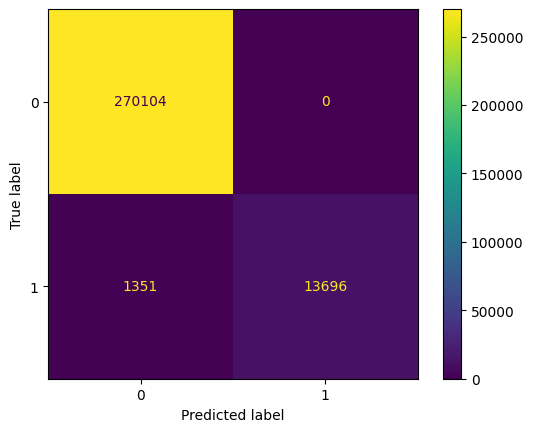

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()
plt.savefig("./images_to_pdf/confusion_matrix.png")

In [14]:
a,b,c,d = cm.ravel()
(a,b,c,d)

(270104, 0, 1351, 13696)

In [15]:
percentage_A = a / (a + b) #True positives = True positives / (True positives + false positives)
percentage_D = d / (d + c) #True positives = True negatives / (True negatives + false negatives)
print("Precission in true positives (A):",percentage_A," Precission in true negatives (D):",percentage_D)

Precission in true positives (A): 1.0  Precission in true negatives (D): 0.9102146607297136


In [16]:
from joblib import dump, load
dump(random_forest, './random_forest_churn.joblib')

['./random_forest_churn.joblib']

In [17]:
#function to get all clients churn probability: 0 means no churn, 1 means churn
def getChurnProbabilities(random_forest, x):
    return random_forest.predict_proba(x)

In [18]:
proba_matrix = getChurnProbabilities(random_forest, x)

In [19]:
len(proba_matrix)

1140604

In [20]:
#function to set each client according to low, mid or high churn chance (given low and high percentages by the user)
def showProbabilities(low,mid,high):
    clients_permanent = []
    clients_low = []
    clients_mid = []
    clients_high = []
    i = 0
    #for each client in the data set
    for client in proba_matrix:
        #get all their data and their churn chance into one list
        client_index = x.index[i]
        client_info = x.loc[client_index].values
        client_info = np.append(client_info,client[1])
        #store client data into profiles(permanent, low, mid, high) list
        if client[1] < low:
            clients_permanent.append(client_info)
        elif client[1] < mid:
            clients_low.append(client_info)
        elif client[1] < high:
            clients_mid.append(client_info)
        else:
            clients_high.append(client_info)
        i += 1
    return clients_permanent, clients_low, clients_mid, clients_high


In [21]:
clients_permanent, clients_low, clients_mid, clients_high = showProbabilities(.30,.60,.80)

print(len(clients_permanent), " clients have no churn chances")
print(len(clients_low), " clients have low churn chances")
print(len(clients_mid), " clients have mid churn chances")
print(len(clients_high), " clients have high churn chances")

1080398  clients have no churn chances
59755  clients have low churn chances
420  clients have mid churn chances
31  clients have high churn chances


In [22]:
#function to get each groups relevance in terms of bill amount by getting the sum of a determined group
def getClassificationSum(churn_group):
    names = x_test.columns.to_list()
    names[0] = "CUSTOMER_ID"
    names.append('CHURN_PERCENTAGE')
    clients_pd = pd.DataFrame(churn_group, columns = names)
    churn_bill_value = (clients_pd['BILL_AMOUNT'] * clients_pd['CHURN_PERCENTAGE']).sum()
    return clients_pd,churn_bill_value

In [23]:
permantent_pd, permanent_value = getClassificationSum(clients_permanent)
low_pd, low_value = getClassificationSum(clients_low)
mid_pd, mid_value = getClassificationSum(clients_mid)
high_pd, high_value = getClassificationSum(clients_high)

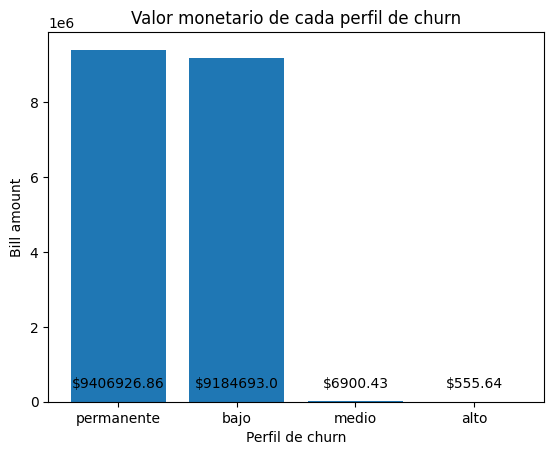

In [24]:
x = ["permanente","bajo","medio","alto"]
y = [permanent_value, low_value, mid_value, high_value]
plt.bar(x,y)
plt.title('Valor monetario de cada perfil de churn')
plt.ylabel('Bill amount')
plt.xlabel('Perfil de churn')
plt.savefig("./images_to_pdf/churn_profile_bill_amount.png")
plt.show()

In [25]:
def plotChurnProfileMean(churn_profile, churn_profile_df, columns_to_drop):
    churn_profile_df = churn_profile_df.drop(columns = columns_to_drop)
    names = churn_profile_df.columns
    x = churn_profile_df.mean()
    y = names
    plt.plot(x, y, marker = 'o')
    for i, value in enumerate(x):
        value = round(value,2)
        plt.annotate(value, (x[i], y[i]))
    plt.savefig("./images_to_pdf/"+ churn_profile + "_profile_mean_data.png", bbox_inches = "tight")
    plt.show()

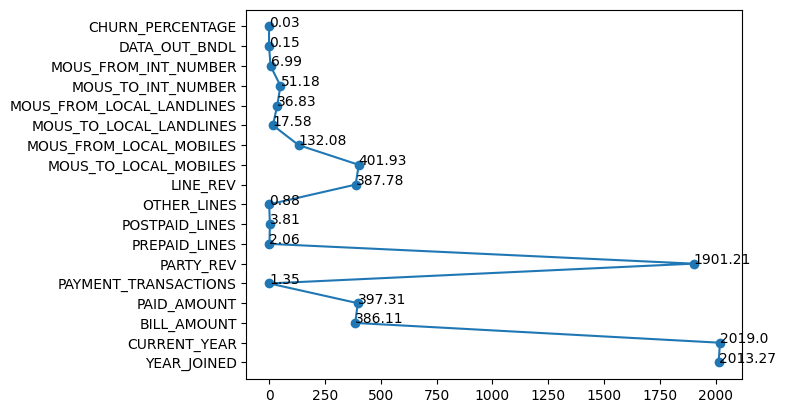

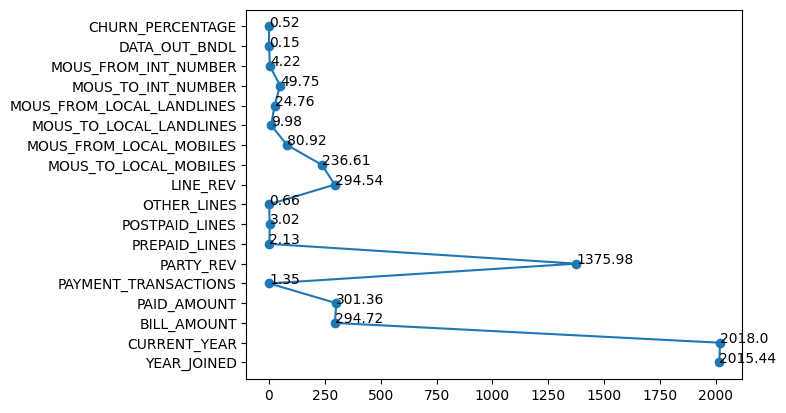

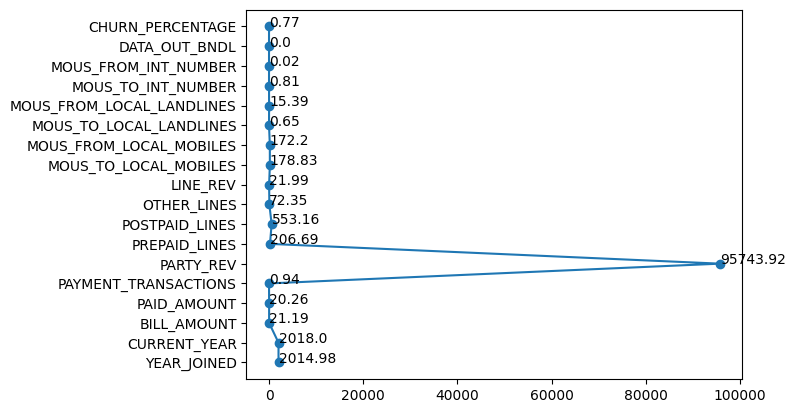

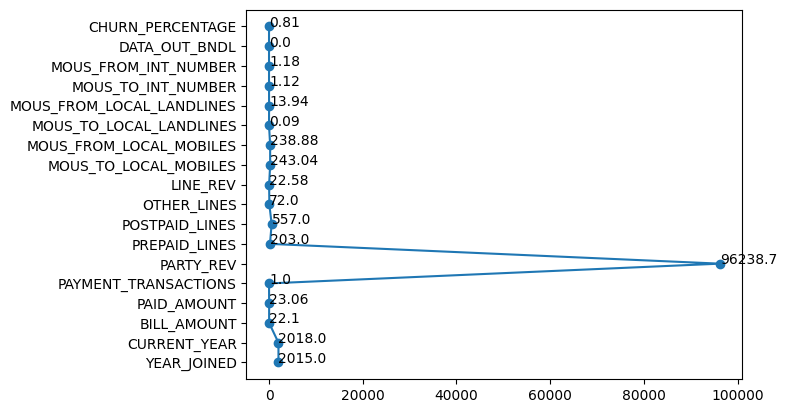

In [26]:
plotChurnProfileMean("permanent",permantent_pd, ["CUSTOMER_ID", "DATA_IN_BNDL"])
plotChurnProfileMean("low",low_pd, ["CUSTOMER_ID", "DATA_IN_BNDL"])
plotChurnProfileMean("mid",mid_pd, ["CUSTOMER_ID", "DATA_IN_BNDL"])
plotChurnProfileMean("high",high_pd, ["CUSTOMER_ID", "DATA_IN_BNDL"])

In [27]:
mse_test = mean_squared_error(y_test, y_pred)
mse_test

0.004737840652847088

In [28]:
mae_test = mean_absolute_error(y_test,y_pred)
mae_test

0.004737840652847088

In [29]:
y_pred_train = random_forest.predict(x_train)

In [30]:
mse_train = mean_squared_error(y_train,y_pred_train)
mse_train

0.004805640987874261

In [31]:
mae__train = mean_absolute_error(y_train, y_pred_train)
mae__train

0.004805640987874261

In [32]:
print("accuracy Test: ", accuracy_score(y_test, y_pred))
print("accuracy Train: ", accuracy_score(y_train, y_pred_train))

print("loss Test: ", log_loss(y_test,y_pred))
print("loss Train: ", log_loss(y_train, y_pred_train))

print("ROC_AUC: ", roc_auc_score(y_test,y_pred))

accuracy Test:  0.9952621593471529
accuracy Train:  0.9951943590121257
loss Test:  0.1636392189034042
loss Train:  0.1659809595144077
ROC_AUC:  0.9551073303648567
